In [4]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#to read csv file
df=pd.read_csv('Churn_Modelling.csv')

In [6]:
# To display first 5 records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df[df['Exited']==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [11]:
df[df['Exited']==0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


C:\Users\Siddhi\AppData\Local\Temp\ipykernel_12200\3053634465.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

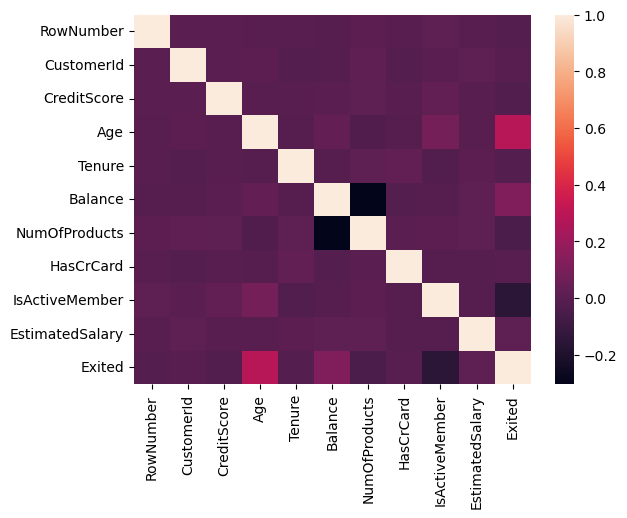

In [12]:
# checking the correlation between the columns
sns.heatmap(df.corr())

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.shape

(10000, 14)

boxplot CreditScore


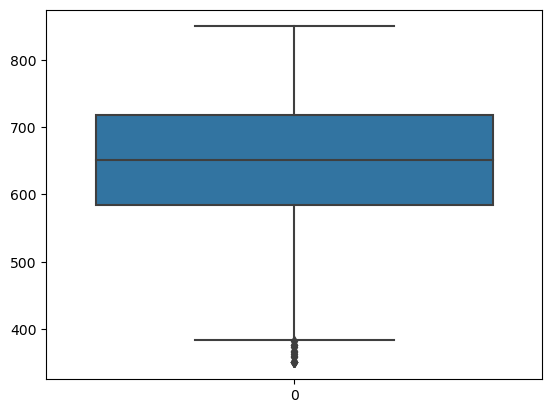

boxplot Age


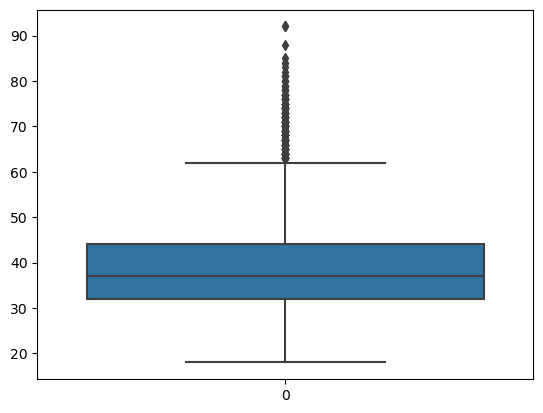

boxplot Tenure


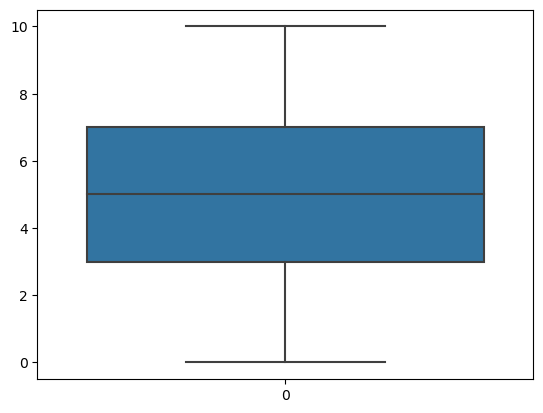

boxplot Balance


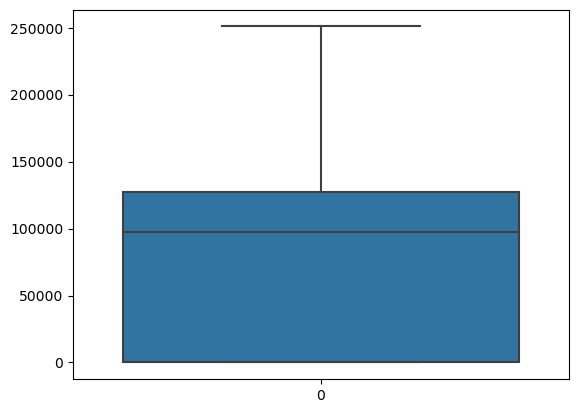

boxplot NumOfProducts


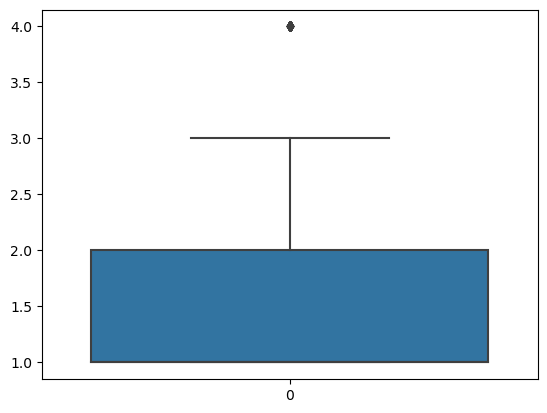

boxplot HasCrCard


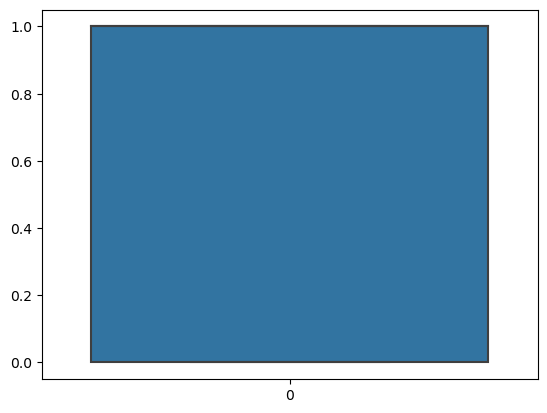

boxplot IsActiveMember


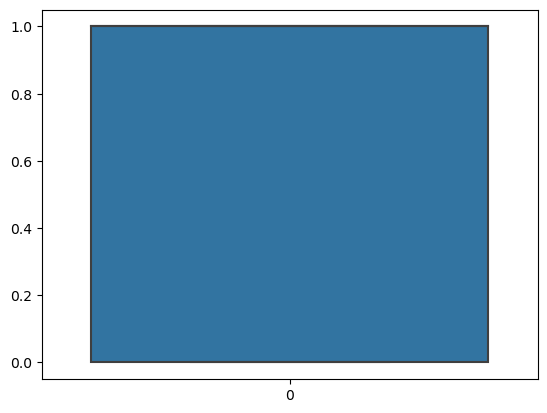

boxplot EstimatedSalary


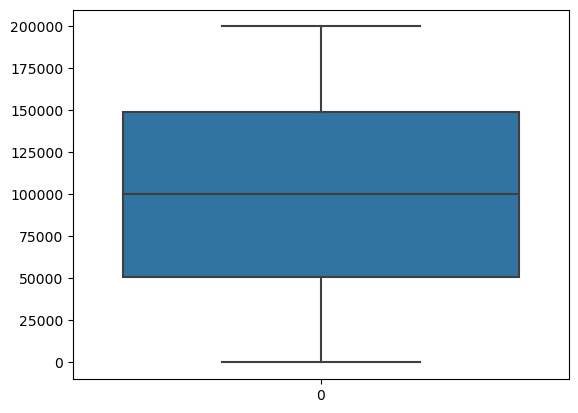

In [15]:
#Box plot to check outliers
for i in df.columns[3:-1]:
    if df[i].dtype =='float64' or df[i].dtype== 'int64':
        print("boxplot",i)
        sns.boxplot(df[i])
        plt.show()

In [16]:
# To remove outliers
def remove_outliers(df,col,multiplier=1.0):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(multiplier*IQR)
    upper_bound=Q3+(multiplier*IQR)
    df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    return df

boxplot CreditScore


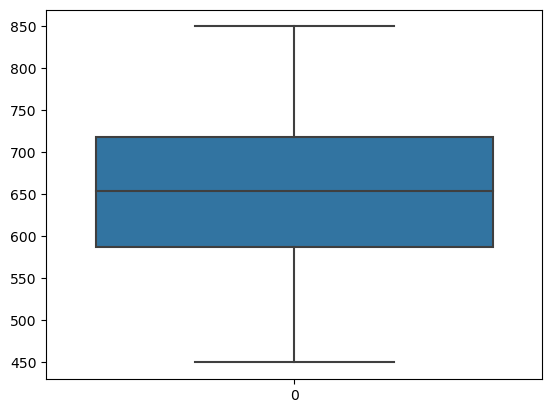

boxplot Age


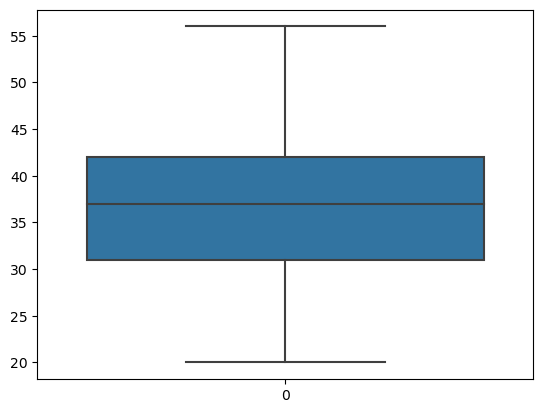

boxplot Tenure


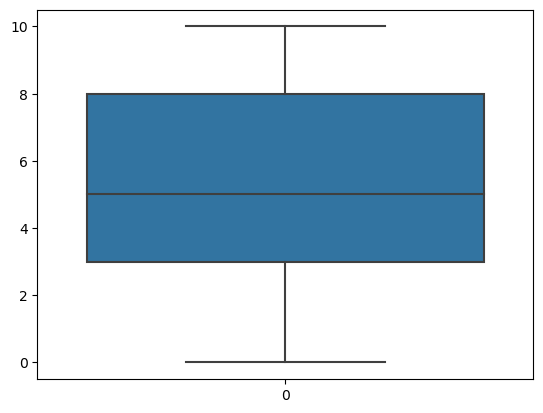

boxplot Balance


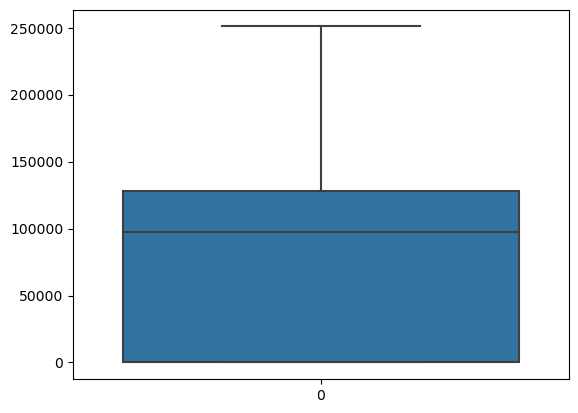

boxplot NumOfProducts


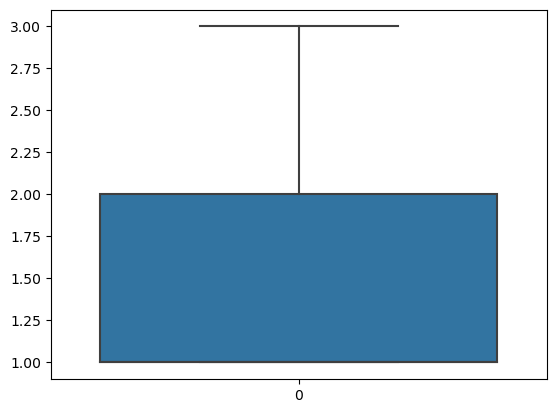

boxplot HasCrCard


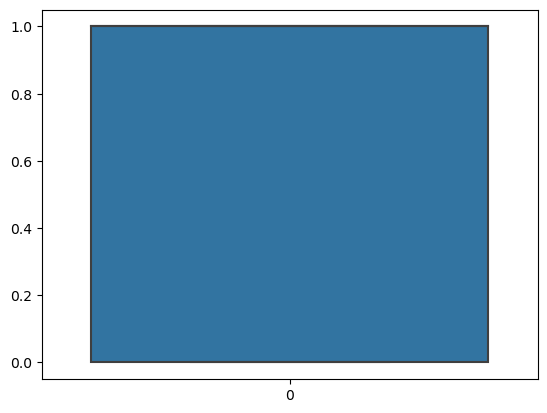

boxplot IsActiveMember


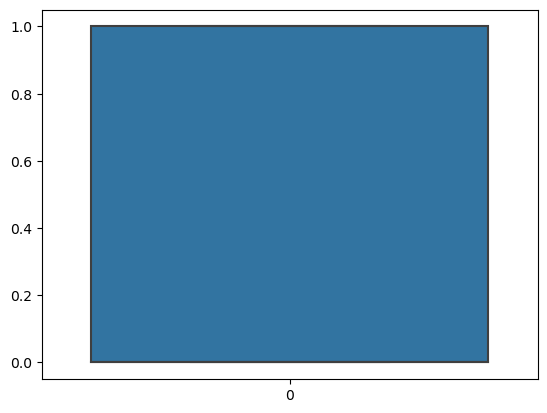

boxplot EstimatedSalary


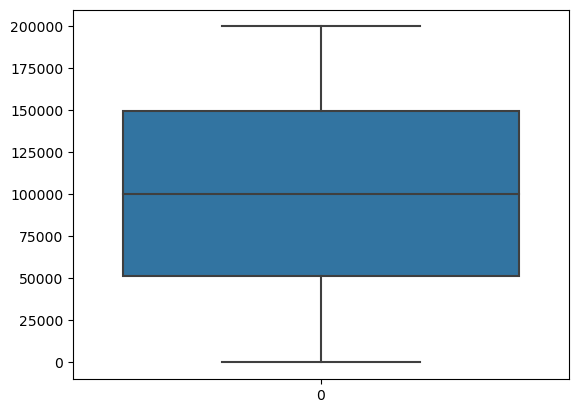

In [17]:
for i in df.columns[3:-1]:
    if df[i].dtype =='float64' or df[i].dtype== 'int64':
        print("boxplot",i)
        df=remove_outliers(df,i)
        sns.boxplot(df[i])
        plt.show()

CreditScore


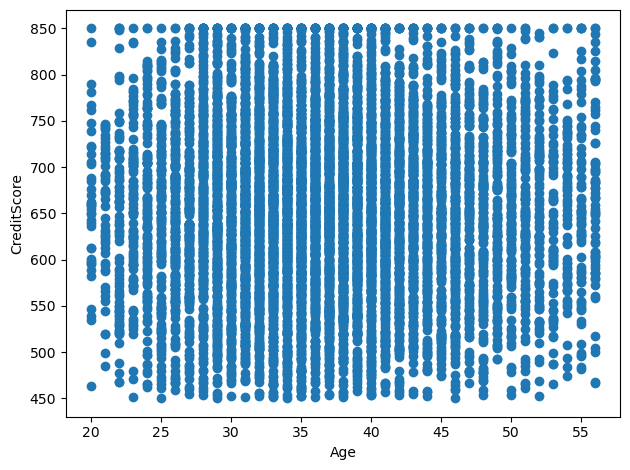

Age


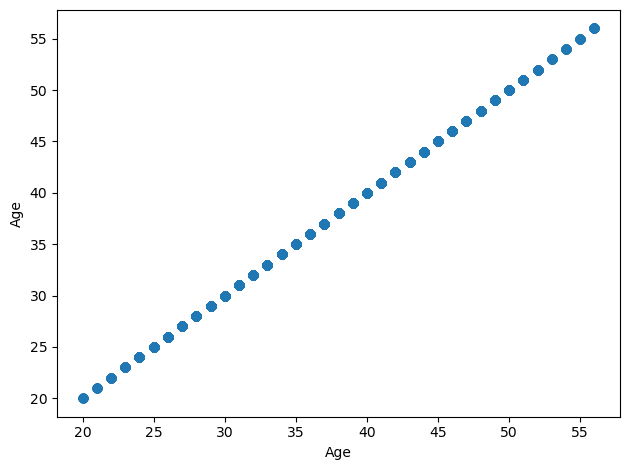

Tenure


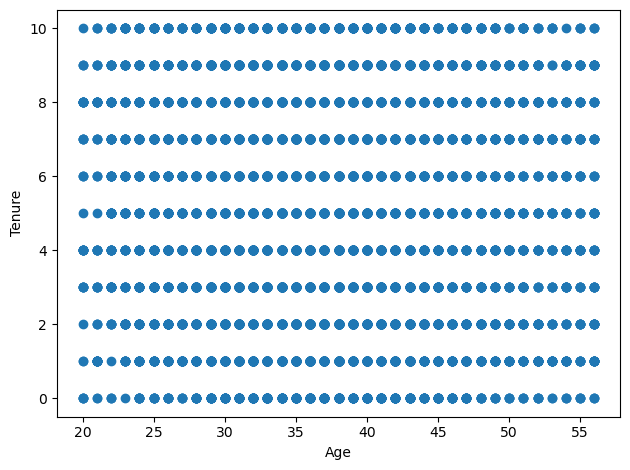

Balance


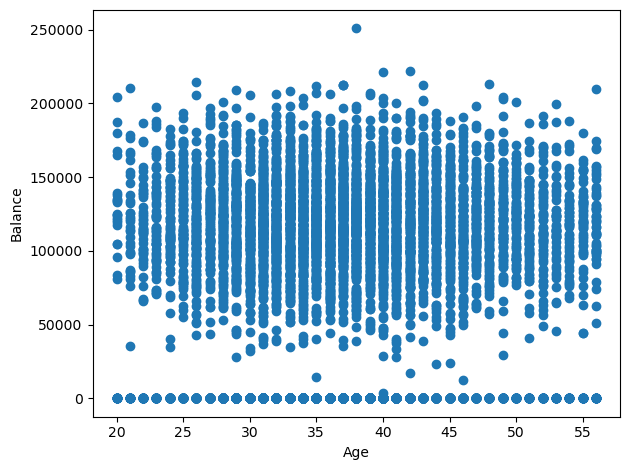

NumOfProducts


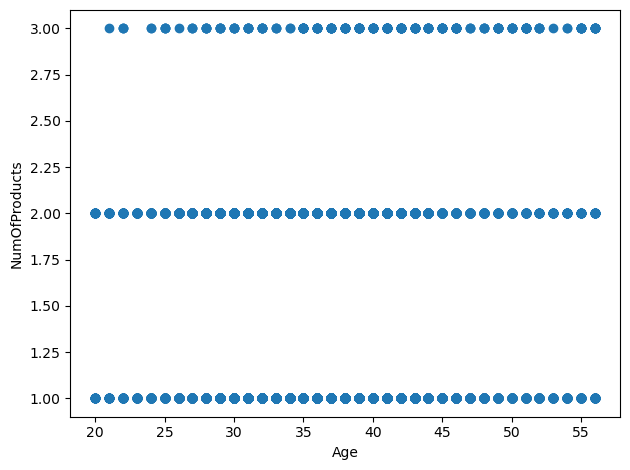

HasCrCard


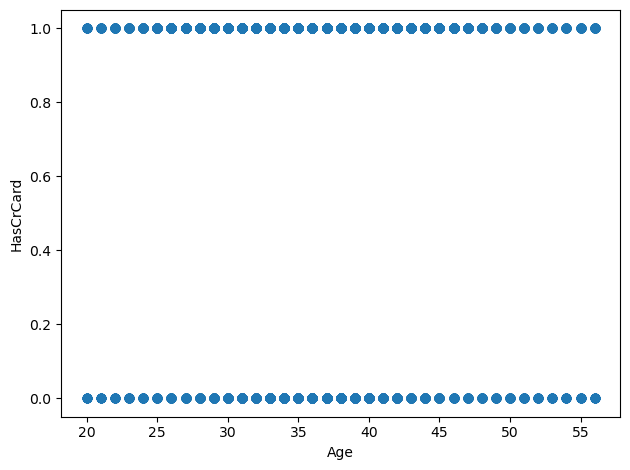

IsActiveMember


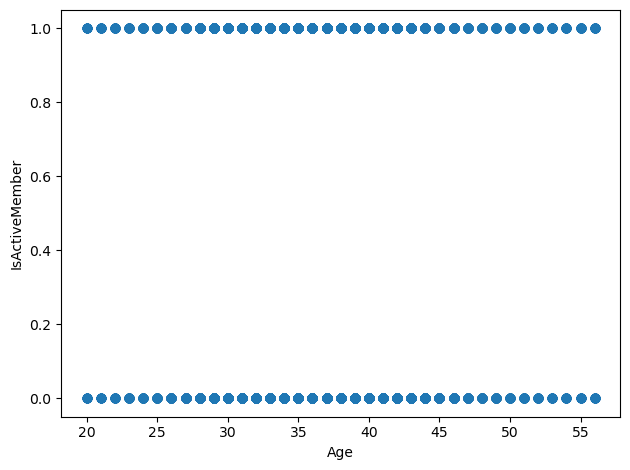

EstimatedSalary


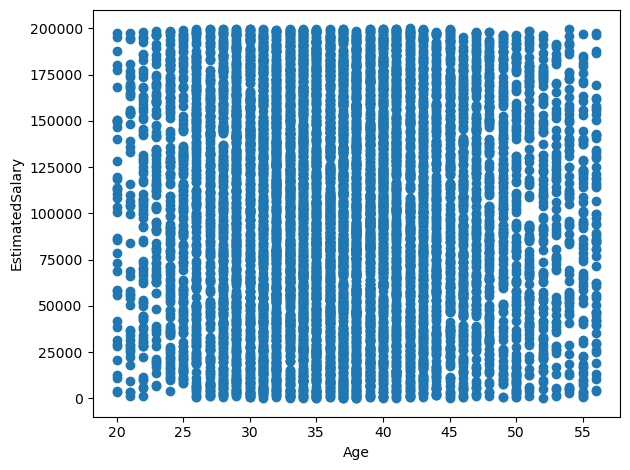

In [18]:
#scatter plot to check relation between columns
for i in df.columns[3:-1]:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        print(i)
        plt.scatter(x='Age',y=i,data=df)
        plt.xlabel('Age')
        plt.ylabel(i)
        plt.tight_layout()
        plt.show()

In [19]:
# To check unique values in Geography column
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
# assigning variable name to drop multiple columns 
cols=['RowNumber','CustomerId','Surname']

In [21]:
#To drop columns
df=df.drop(cols,axis=1)

In [22]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
from tabulate import tabulate

Geography
-------  ----
France   4522
Spain    2242
Germany  2242
-------  ----


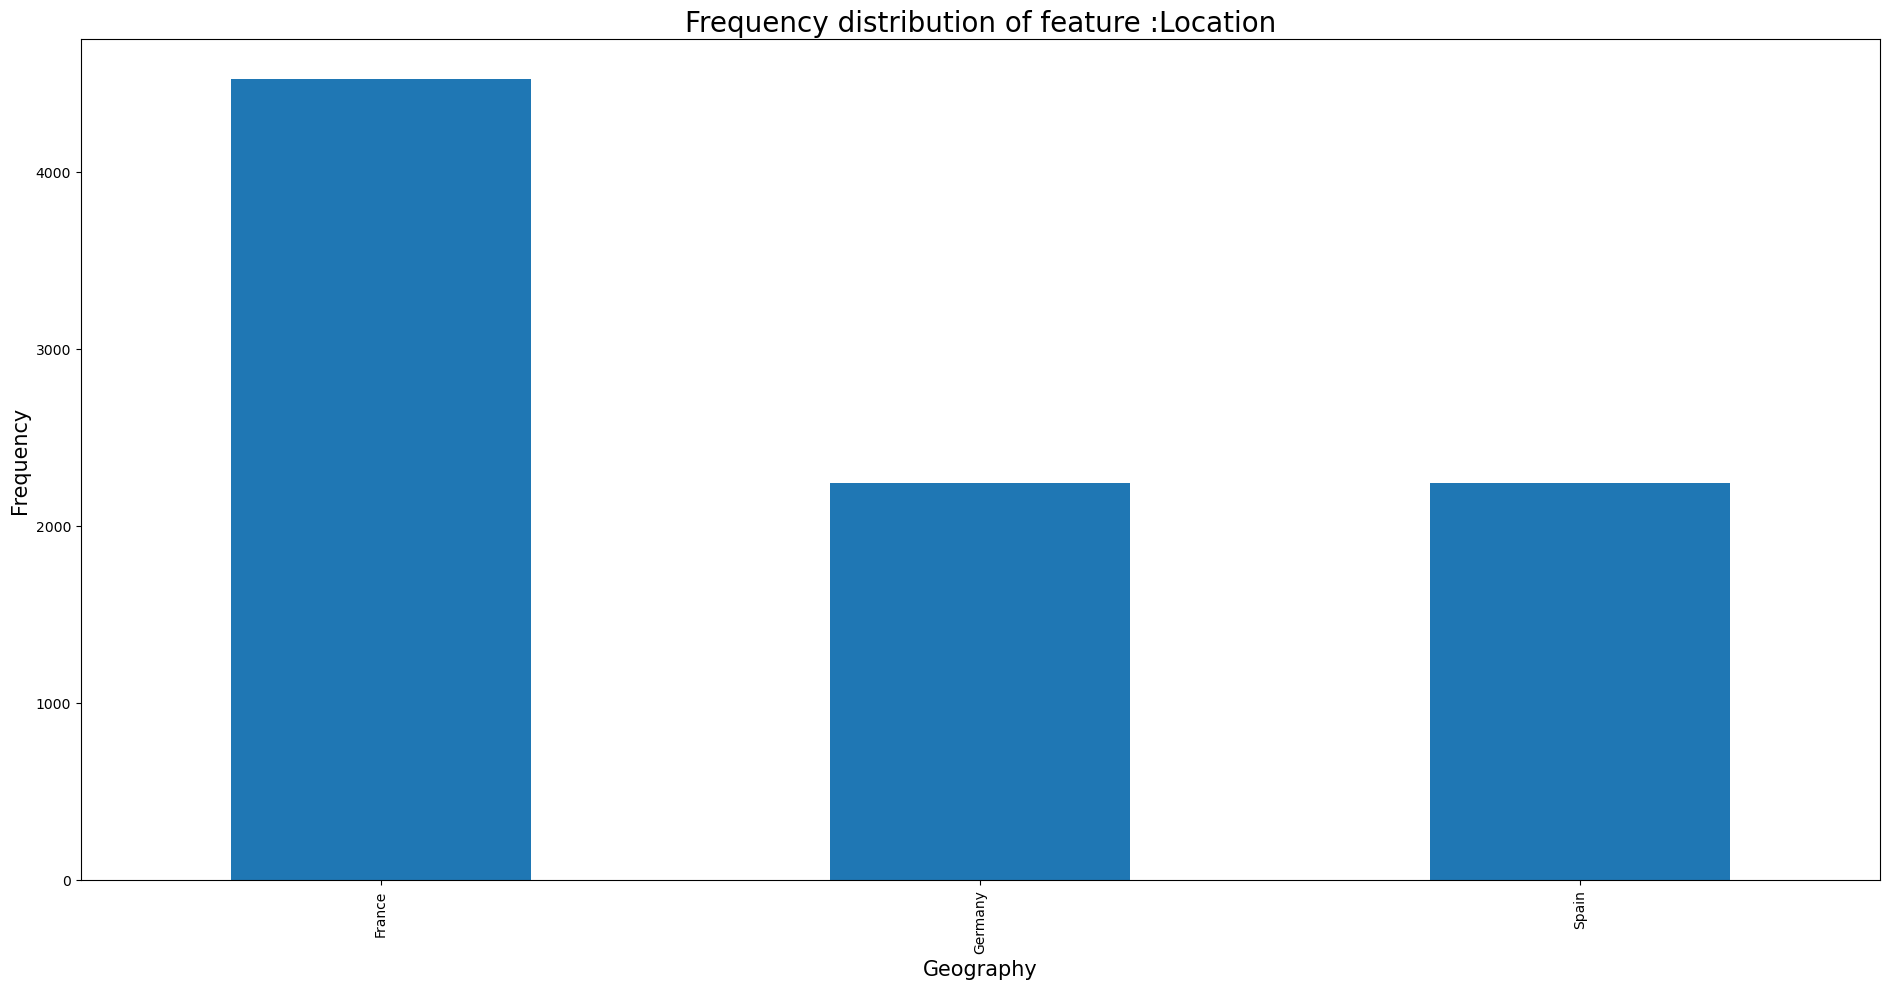

In [24]:
print("Geography")
print(tabulate(pd.DataFrame(df.Geography.value_counts())))
plt.figure(figsize=(19,10));
df.groupby("Geography")["Geography"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Frequency distribution of feature :Location", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Geography", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Gender
------  ----
Male    4917
Female  4089
------  ----


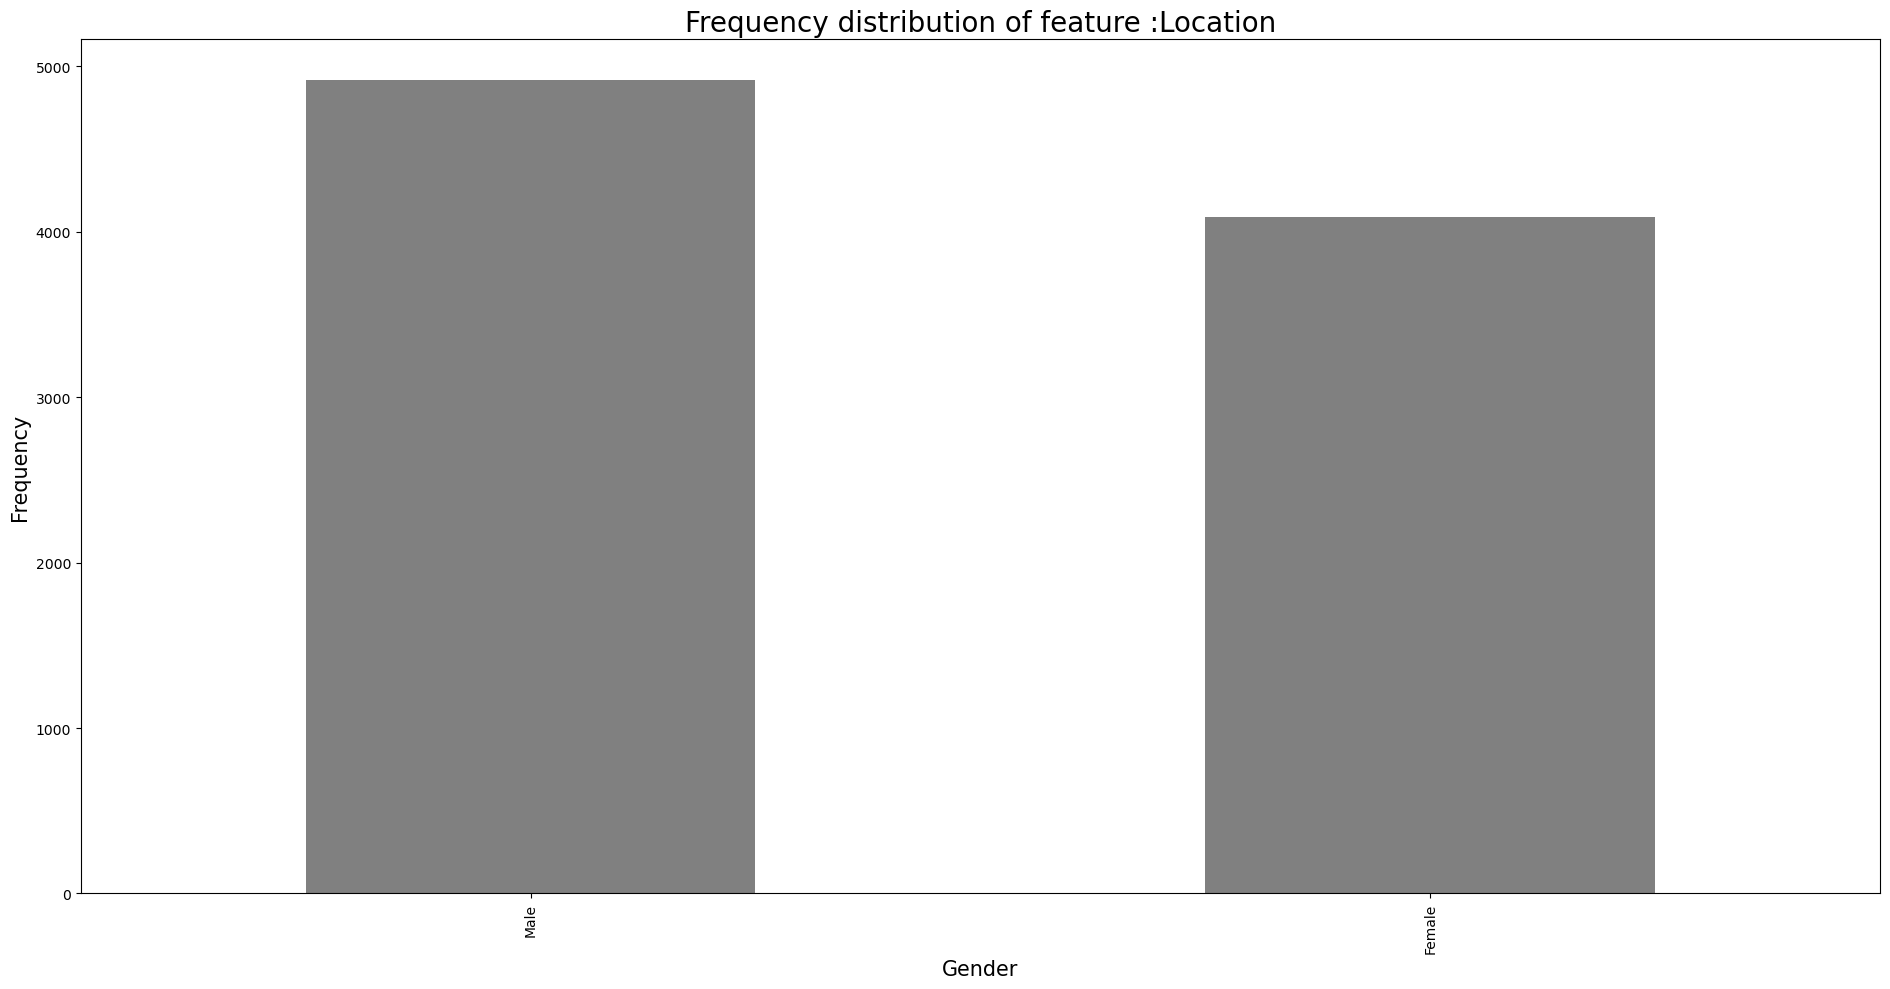

In [25]:
print("Gender")
print(tabulate(pd.DataFrame(df.Gender.value_counts())))
plt.figure(figsize=(19,10));
df.groupby("Gender")["Gender"].count().sort_values(ascending=False)[:20].plot(kind="bar",color="Grey")
plt.title("Frequency distribution of feature :Location", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

[]

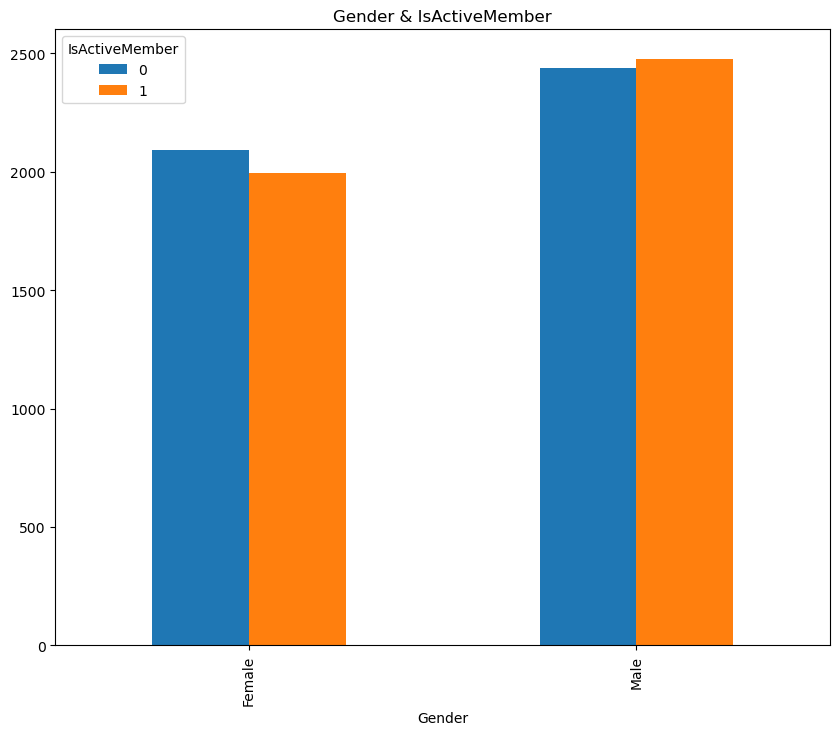

In [26]:
pd.crosstab(df['Gender'], df['IsActiveMember']).plot(kind="bar",
                                               figsize=(10, 8), 
                                               title="Gender & IsActiveMember");
plt.plot()

[]

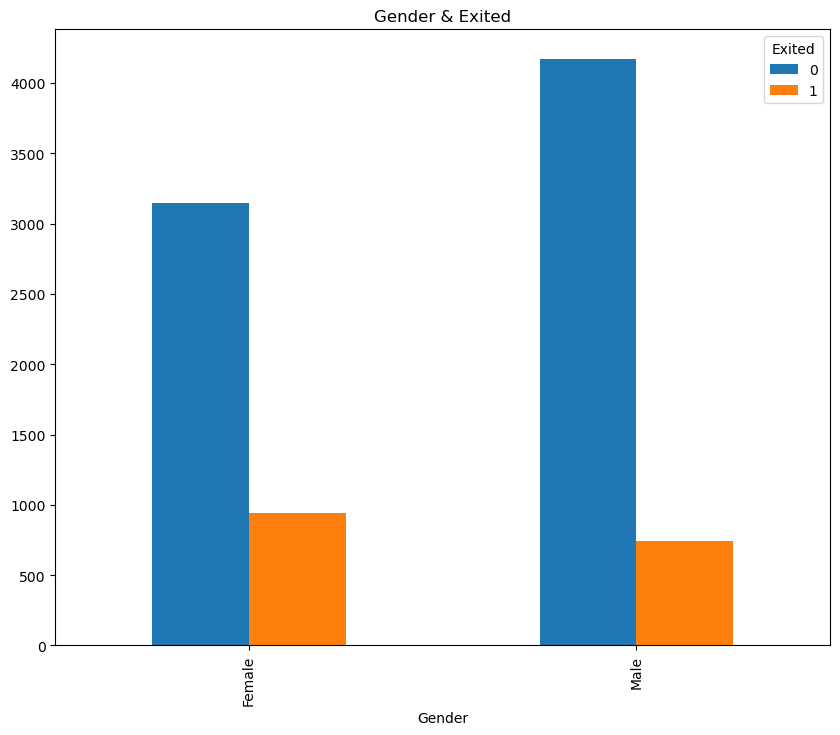

In [27]:
pd.crosstab(df['Gender'], df['Exited']).plot(kind="bar",
                                               figsize=(10, 8), 
                                               title="Gender & Exited");
plt.plot()

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# converting string to int
lb=LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])
df['Geography']=lb.fit_transform(df['Geography'])

In [30]:
df.head()
#In gender female is 0 and male is 1
# in geography france is 0,germany is 1, spain is 2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [31]:
#creating x by dropping Exited column
x=df.drop('Exited',axis=1)
# creating y by storing Exited column in variable y
y=df['Exited']

# MODEL BUILDING and checking accuracy of different models

# LOGISTIC REGRESSION

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
Logi=LogisticRegression()
Logi.fit(x_train,y_train)
ypred_logi=Logi.predict(x_test)

In [36]:
ypred_logi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
acc_logi=accuracy_score(y_test,ypred_logi)

In [39]:
acc_logi

0.8201997780244173

In [40]:
# After performing Logistic Regression accuracy is 82%

In [41]:
#comparing the actual and predicted values
confusion_matrix(y_test,ypred_logi)

array([[1441,   33],
       [ 291,   37]], dtype=int64)

In [42]:
print(classification_report(y_test,ypred_logi))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1474
           1       0.53      0.11      0.19       328

    accuracy                           0.82      1802
   macro avg       0.68      0.55      0.54      1802
weighted avg       0.78      0.82      0.77      1802



In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

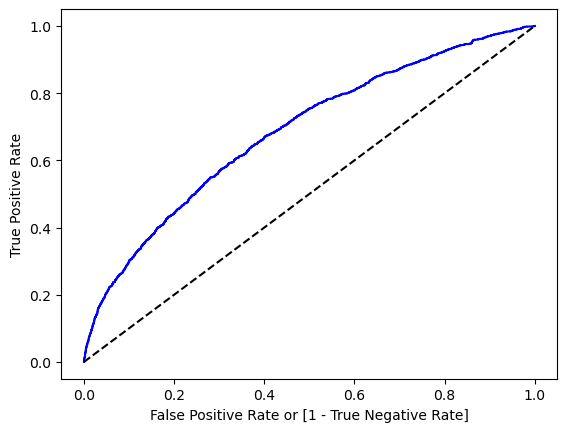

auc accuracy: 0.545208409173644


In [44]:
#AUC ROC curve
fpr,tpr,thresholds=roc_curve(y,Logi.predict_proba(x)[:,1])
auc=roc_auc_score(y_test,ypred_logi)

plt.plot(fpr,tpr,color='blue',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

# DECISION TREE

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y)

In [47]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [48]:
from sklearn.tree import export_graphviz
from sklearn import tree

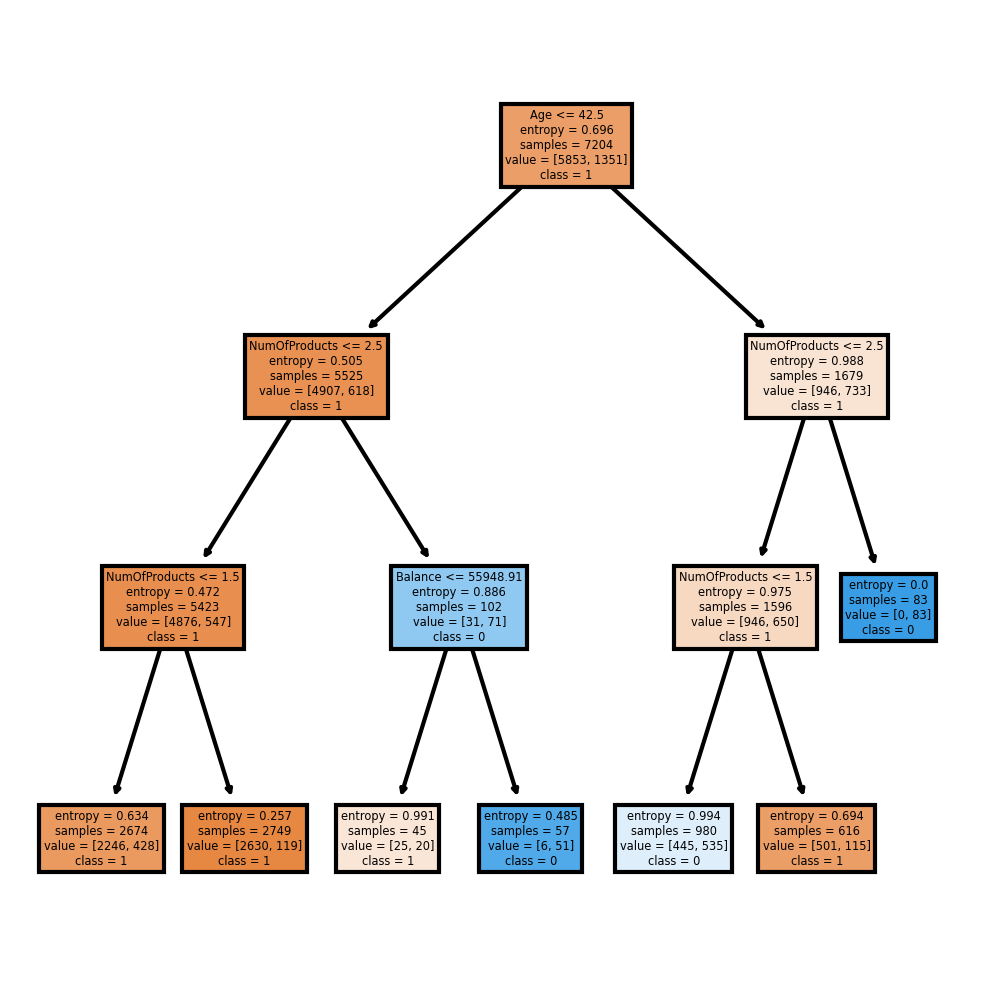

In [49]:
fn=['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [50]:
ypred_dt = model.predict(x_test) 

In [51]:
ypred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
acc_dt=accuracy_score(y_test,ypred_dt)

In [53]:
acc_dt

0.8429522752497225

In [54]:
#after performing decision tree accuracy is 83%

In [55]:
cm=confusion_matrix(y_test,ypred_dt)

In [56]:
cm

array([[1358,  106],
       [ 177,  161]], dtype=int64)

In [57]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1464
           1       0.60      0.48      0.53       338

    accuracy                           0.84      1802
   macro avg       0.74      0.70      0.72      1802
weighted avg       0.83      0.84      0.84      1802



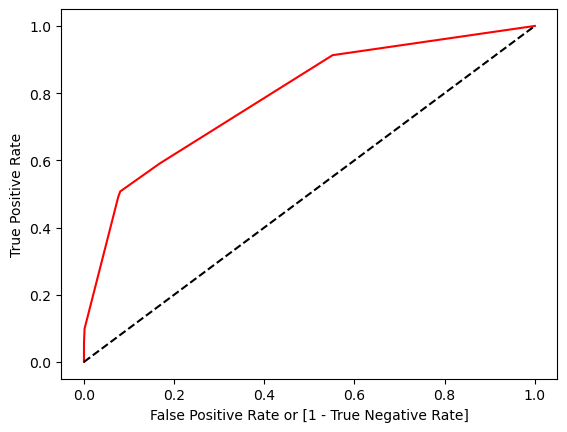

auc accuracy: 0.701963494681023


In [58]:
#AUC ROC curve
fpr,tpr,thresholds=roc_curve(y,model.predict_proba(x)[:,1])

auc=roc_auc_score(y_test,ypred_dt)

plt.plot(fpr,tpr,color='red',label='dt model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

# RANDOM FOREST 

In [59]:
from sklearn.ensemble import RandomForestClassifier as RF

In [60]:
model_rf = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy",random_state=42)
model_rf.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True, random_state=42)

In [61]:
ypred_rf=model_rf.predict(x_test)

In [62]:
ypred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
acc_rf=accuracy_score(y_test,ypred_rf)

In [64]:
acc_rf

0.8601553829078802

In [65]:
#after performing random forest the accuracy is 84%

In [66]:
cm=confusion_matrix(y_test,ypred_rf)

In [67]:
cm

array([[1400,   64],
       [ 188,  150]], dtype=int64)

In [68]:
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1464
           1       0.70      0.44      0.54       338

    accuracy                           0.86      1802
   macro avg       0.79      0.70      0.73      1802
weighted avg       0.85      0.86      0.85      1802



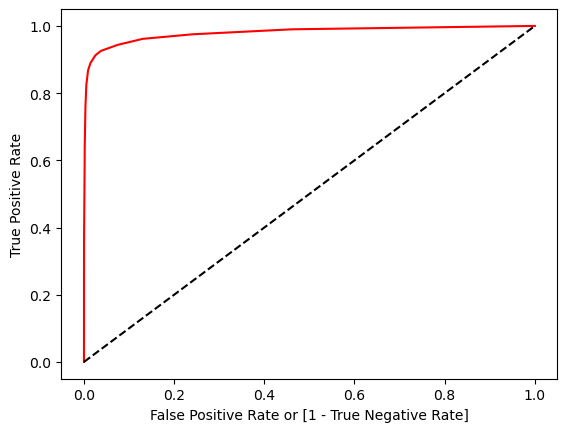

auc accuracy: 0.7000355676269926


In [69]:
#AUC ROC curve
fpr,tpr,thresholds=roc_curve(y,model_rf.predict_proba(x)[:,1])
auc=roc_auc_score(y_test,ypred_rf)
plt.plot(fpr,tpr,color='red',label='RF model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

# K Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
#predicting using the KNeighbors_Classifier
model_KNN = KNeighborsClassifier(n_neighbors=7)

#fit the model on the data and predict the values
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [72]:
prediction_knn= model_KNN.predict(x_test)

In [73]:
acc_knn=accuracy_score(y_test,prediction_knn)

In [74]:
acc_knn

0.7924528301886793

In [75]:
cm=confusion_matrix(y_test,prediction_knn)

In [76]:
cm

array([[1407,   57],
       [ 317,   21]], dtype=int64)

In [77]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1464
           1       0.27      0.06      0.10       338

    accuracy                           0.79      1802
   macro avg       0.54      0.51      0.49      1802
weighted avg       0.71      0.79      0.74      1802



In [78]:
# after checking accuracy of different models random forest is providing highest accuracy . Hence we are considering the model which is providing highest accuracy hence we are going ahead with random forest

In [79]:
import pickle

In [80]:
model_rf

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True, random_state=42)

In [81]:
filename = 'churn_prediction.sav'
pickle.dump(model_rf, open(filename, 'wb'))